In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

print (X_train)
print (y)
# del X_train,X_test

[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]
[0 1 1 ... 1 0 1]


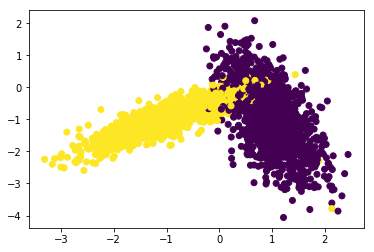

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV



```
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
```




    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows

        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies

        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies

        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure

        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

    # 5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
    # 6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
    # 7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

In [0]:
import itertools
from tqdm import tqdm
import random

params = []

def random_n_nos_from_between_tuple(tuple,n):
  return random.sample(range(tuple[0],tuple[1]),n)

def RandomSearchCV(X_train, y_train, classifier, param_range, folds):
  global params
  trainscore = []
  testscore = []
  # Randomly select 10 nos from the min amd max of param_range, which is a tuple.
  params = random_n_nos_from_between_tuple(param_range, 10)
  #params_global = params.copy()
  print(params)                                
  # For each hyperparameter randomly selected in params,                               
  for k in tqdm(params):
    trainscore_folds = []
    testscore_folds = []
    
    # We divide X_train and y_train into 'folds' parts as the algo above says. If folds = 3, we have 3 equal length sublists of X-train in divided_X-train and 
    # 3 equal length sublists of y_train in divided_y_train. The two new lists are also numpy arrays.                              
    divided_X_train = np.array_split(X_train,folds)
    divided_y_train = np.array_split(y_train,folds) 
    #print(X_train.shape)
    #print(np.array(divided_X_train).shape)
                                  
    fold = range(1,folds+1) # if folds = 3, fold = [1,2,3]
    #chunk = len                              
    for i in fold:
      trainer_X = []
      tester_X = []    
      trainer_y = []
      tester_y = []
                                  
      # pivot is the index for test set and not_pivot for train sets.                             
      pivot = i
      not_pivot = [item for item in fold if item!=pivot]  
      
      # Append all not_pivot indices and make a new train set                            
      for j in not_pivot:
        trainer_X.append(divided_X_train[j-1])                            
        trainer_y.append(divided_y_train[j-1])
      # Since after appending, trainer_X and y are list of lists (As divided_X_Train and y_train were list of lists), we flatten them out to make a single list.
      # What we do is reshaping 2*2500*2 array into 5000*2 arrays
      trainer_X = np.array(trainer_X)
      trainer_y = np.array(trainer_y)
      
      trainer_X = trainer_X.reshape((5000,2))
      trainer_y = trainer_y.reshape((5000,))
      
      # Append all pivot indices and make new test set                            
      tester_X = np.array(divided_X_train[pivot-1])
      tester_y = np.array(divided_y_train[pivot-1])
      
      # Fit classfier                            
      classifier.n_neighbors = k
      classifier.fit(trainer_X, trainer_y)
      
      # Predicts out Y values based on the x_test and computes accuracy values.                             
      predicted_y = classifier.predict(tester_X)
      testscore_folds.append(accuracy_score(tester_y,predicted_y))    
                         
      # Predicts out Y values based on the x_train and computes accuracy values.                            
      predicted_y = classifier.predict(trainer_X)         
      trainscore_folds.append(accuracy_score(trainer_y,predicted_y))    
  
  # We calculate the means of all acc values found from one iteration of folds and store them in array and return them.                               
    testscore.append(np.mean(np.array(testscore_folds)))   
    trainscore.append(np.mean(np.array(trainscore_folds)))   
    
  for i in range(10):
    for j in range(10):
      if params[i]<params[j]:
        
        temp_p = params[i]
        params[i] = params[j]
        params[j] = temp_p
        
        temp_tr = trainscore[i]
        trainscore[i] = trainscore[j]
        trainscore[j] = temp_tr
        
        temp_ts = testscore[i]
        testscore[i] = testscore[j]
        testscore[j] = temp_ts
                                  
  return trainscore,testscore

  0%|          | 0/10 [00:00<?, ?it/s]

[36, 1, 34, 40, 27, 35, 19, 33, 26, 9]


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


[1, 9, 19, 26, 27, 33, 34, 35, 36, 40]
[1.0, 0.9608666666666666, 0.9571333333333333, 0.9573999999999999, 0.9573999999999999, 0.9575999999999999, 0.9579333333333334, 0.9576666666666666, 0.9580666666666667, 0.9586]
[0.9296000000000001, 0.9529333333333333, 0.9541333333333334, 0.9546666666666667, 0.9538666666666668, 0.9557333333333333, 0.9561333333333333, 0.9553333333333334, 0.9556, 0.956]


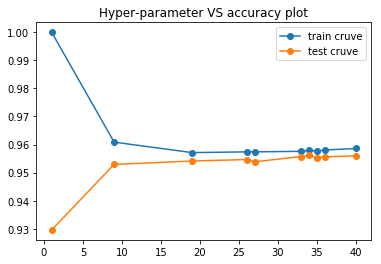

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
param_range = (1,50)
folds = 3

trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, param_range, folds)

print(params)
print(trainscores)
print(testscores)

plt.plot(params,trainscores, '-o', label='train cruve')
plt.plot(params,testscores, '-o', label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [0]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

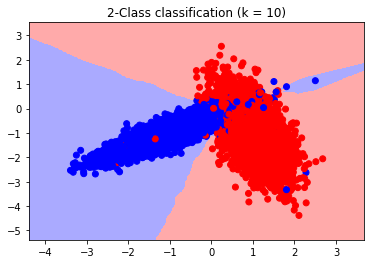

In [0]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 10)
# if we give 10 as NNs, we can see there is another band for the blue region which is not needed. So, we increase the NN no to generalise the graph further. 
neigh.fit(X_train, y_train)

# X_train here is a set of 2 columns and n rows. X_train[:,0] is first row and X_train[:,1] is the second. 
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

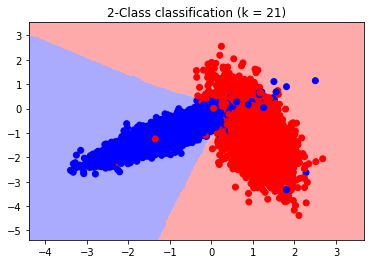

In [0]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
# if we give 20 as NNs, we can see there is a perfect generalization and hence any NN no in range 20-25 can be used here.  
neigh.fit(X_train, y_train)

# X_train here is a set of 2 columns and n rows. X_train[:,0] is first row and X_train[:,1] is the second. 
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)